In [68]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [69]:
#Reading in Dataframe
df = pd.read_csv('diabetes-dataset.csv')

In [70]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [71]:
#Dropping all rows with missing data (none were affected)
df.replace(to_replace='?',value=np.NaN,inplace=True)
df.dropna(inplace=True)

In [72]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [73]:
#Removing the rows that have zeros, excluding columns "Pregnancies" and "Outcome"
df['Glucose'].replace(to_replace=0,value=np.NaN,inplace=True)
df['BloodPressure'].replace(to_replace=0,value=np.NaN,inplace=True)
df['SkinThickness'].replace(to_replace=0,value=np.NaN,inplace=True)
df['Insulin'].replace(to_replace=0,value=np.NaN,inplace=True)
df['BMI'].replace(to_replace=0,value=np.NaN,inplace=True)
df['DiabetesPedigreeFunction'].replace(to_replace=0,value=np.NaN,inplace=True)
df['Age'].replace(to_replace=0,value=np.NaN,inplace=True)
df.dropna(inplace=True)

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
8,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1994,1,79.0,60.0,42.0,48.0,43.5,0.678,23,0
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [75]:
#Redoing the ordering so that it applies to this new df
df.reset_index(inplace=True,drop=True)

In [76]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
1,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
2,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
3,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
4,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1030,1,79.0,60.0,42.0,48.0,43.5,0.678,23,0
1031,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1032,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1033,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [77]:
#Splitting the df into pieces: 80% for training dataset, 10% for the test set, and 10% for validation set.
df.loc[:827].to_csv('Training_Dataset.csv',index=False)
df.loc[827:931].to_csv('Test_Dataset.csv', index=False)
df.loc[931:].to_csv('Validation_Dataset.csv', index=False)

In [78]:
df_training = pd.read_csv('Training_Dataset.csv')
df_test = pd.read_csv('Test_Dataset.csv')
df_validation = pd.read_csv('Validation_Dataset.csv')

In [79]:
df_training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
1,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
2,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
3,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
4,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
823,2,142.0,94.0,59.0,177.0,38.3,0.620,63,1
824,0,163.0,40.0,23.0,64.0,40.7,0.322,33,0
825,2,167.0,44.0,30.0,140.0,52.7,0.452,28,0
826,1,130.0,70.0,13.0,105.0,25.9,0.472,22,0


In [80]:
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95.0,74.0,21.0,73.0,25.9,0.673,36,0
1,8,126.0,88.0,36.0,108.0,38.5,0.349,49,0
2,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
3,3,99.0,62.0,19.0,74.0,21.8,0.279,26,0
4,1,90.0,62.0,12.0,43.0,27.2,0.580,24,0
...,...,...,...,...,...,...,...,...,...
100,7,129.0,68.0,49.0,125.0,38.5,0.439,43,1
101,7,142.0,90.0,24.0,480.0,30.4,0.128,43,1
102,3,169.0,74.0,19.0,125.0,29.9,0.268,31,1
103,4,127.0,88.0,11.0,155.0,34.5,0.598,28,0


In [81]:
df_validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,122.0,76.0,27.0,200.0,35.9,0.483,26,0
1,4,110.0,76.0,20.0,100.0,28.4,0.118,27,0
2,2,127.0,46.0,21.0,335.0,34.4,0.176,22,0
3,2,93.0,64.0,32.0,160.0,38.0,0.674,23,1
4,3,158.0,64.0,13.0,387.0,31.2,0.295,24,0
...,...,...,...,...,...,...,...,...,...
99,1,79.0,60.0,42.0,48.0,43.5,0.678,23,0
100,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
101,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
102,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [82]:
#Creating an array of Age data in training dataset
age = df_training['Age'].to_numpy(dtype=np.float32)

In [83]:
age

array([23., 24., 21., 58., 24., 45., 25., 55., 39., 21., 41., 35., 21.,
       21., 21., 24., 28., 33., 56., 26., 54., 22., 26., 30., 58., 42.,
       41., 31., 22., 24., 25., 27., 28., 26., 23., 36., 27., 26., 43.,
       34., 42., 21., 40., 22., 23., 31., 24., 21., 37., 25., 24., 24.,
       46., 23., 39., 21., 25., 23., 26., 30., 23., 40., 33., 30., 26.,
       31., 21., 22., 28., 22., 23., 34., 24., 42., 23., 21., 23., 22.,
       47., 45., 27., 41., 29., 29., 23., 33., 36., 26., 23., 60., 33.,
       31., 25., 40., 29., 23., 26., 29., 27., 55., 57., 21., 24., 36.,
       38., 25., 32., 21., 61., 26., 22., 31., 24., 46., 22., 23., 51.,
       22., 33., 29., 23., 34., 24., 44., 24., 51., 34., 43., 21., 21.,
       25., 23., 22., 39., 37., 51., 34., 29., 26., 33., 21., 25., 31.,
       24., 28., 29., 24., 46., 25., 35., 29., 47., 21., 25., 30., 22.,
       27., 25., 26., 30., 28., 31., 43., 24., 30., 23., 37., 25., 22.,
       26., 33., 22., 36., 49., 22., 26., 24., 28., 48., 29., 29

Text(0.5, 1.0, 'Histogram of Age from Training Dataset')

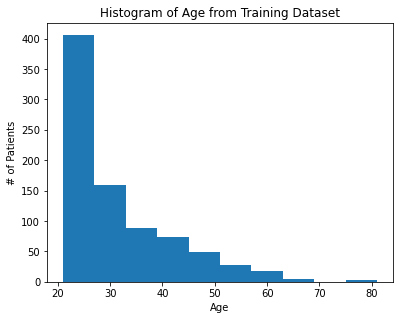

In [84]:
#Histogram of Age Data
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
ax.hist(age)
ax.set_xlabel('Age')
ax.set_ylabel('# of Patients')
ax.set_title('Histogram of Age from Training Dataset')

In [105]:
df_train = df_training.to_numpy(dtype=np.float32)

In [106]:
cor_sample = np.corrcoef(df_train,rowvar=False)

In [107]:
columns=list(df_training.columns)

In [108]:
xs = list(range(len(columns)))

Text(0.5, 1.05, 'Sample Correlation Matrix for Training Dataset')

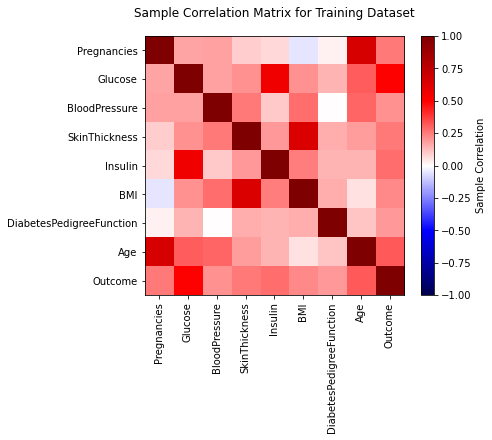

In [109]:
#Plot of Sample Correlation Matrix of Training Data
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cax = ax.matshow(cor_sample,cmap='seismic',vmax=1.0,vmin=-1.0)
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Sample Correlation')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(xs)
ax.set_xticklabels(columns,rotation=90)
ax.set_yticks(xs)
ax.set_yticklabels(columns)
plt.title('Sample Correlation Matrix for Training Dataset')

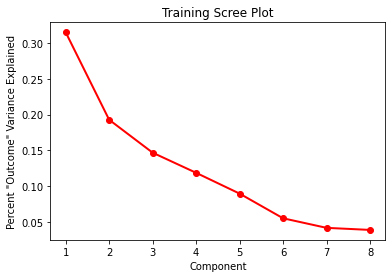

In [111]:
#Creating the PCA and Scree Plot Excluding "Outcome" Column
x_train = df_training[df_training.columns[:-1]].to_numpy(dtype=np.float32)
y_train = df_training[df_training.columns[-1]].to_numpy(dtype=np.float32)
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
x_train_z = (x_train-x_train_mean)/x_train_std
pca = PCA()
y_train = pca.fit_transform(x_train_z)
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Training Scree Plot')
plt.xlabel('Component')
plt.xticks(pc_values)
plt.ylabel('Percent "Outcome" Variance Explained')
plt.show()

In [113]:
#Based on this Scree Plot of the Training Dataframe, it looks like the biggest change in slope is between components 5 and 6; thus I will choose Component 5 as my cutoff (via the "elbow method")

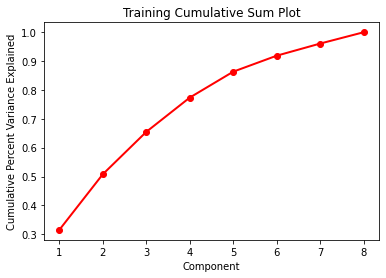

In [114]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Training Cumulative Sum Plot')
plt.xlabel('Component')
plt.xticks(pc_values)
plt.ylabel('Cumulative Percent Variance Explained')
plt.show()

In [115]:
#This is largely supported when also doing a cumulative sum plot, in which 5 components explains around 85% of the data, which in my opinion is a reasonable cutoff when nothing else is specified.

In [122]:
#Determing K-Means Inertias to determine ideal number of clusters (using previously calculated z-score for the Training Dataframe and 5 PCAs)
kMeans_5 = KMeans(n_clusters=5)
pca_5 = PCA(n_components=5)
X_5_pca = pca_5.fit_transform(x_train_z)
means = kMeans_5.fit(X_5_pca).cluster_centers_

In [123]:
means

array([[ 0.44886923,  0.14536077,  1.0629708 , -0.76043504,  0.04042962],
       [ 1.5224282 , -1.5754294 , -0.3708824 ,  0.22089423,  0.18872517],
       [ 2.2037938 ,  1.6563363 ,  0.00650243,  0.20967871, -0.6742508 ],
       [-1.6811327 , -0.2644583 ,  0.25446942,  0.17193252, -0.21500969],
       [-0.30318466,  0.98118824, -0.7495704 ,  0.01195724,  0.36873847]],
      dtype=float32)

In [124]:
inertias = []
ks = []
for i in range(10):
    k = i+1
    ks.append(k)
    print('K='+str(k))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_5_pca)
    print('Inertia='+str(kmeans.inertia_))
    inertias.append(kmeans.inertia_)

K=1
Inertia=5718.4697265625
K=2
Inertia=4288.4326171875
K=3
Inertia=3547.25146484375
K=4
Inertia=3114.91259765625
K=5
Inertia=2863.40087890625
K=6
Inertia=2666.97802734375
K=7
Inertia=2489.0693359375
K=8
Inertia=2349.318115234375
K=9
Inertia=2215.5
K=10
Inertia=2074.7822265625


Text(0.5, 1.0, 'Elbow Plot for Training Dataset K Value Inertias')

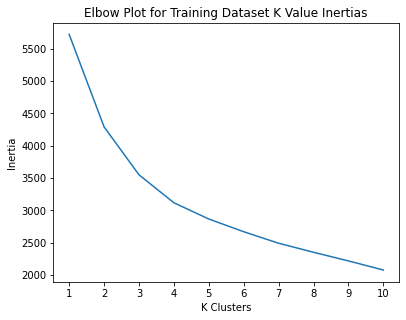

In [126]:
xs = np.array(list(range(len(ks))))
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
ax.plot(xs,inertias)
ax.set_xticks(xs)
ax.set_xticklabels(ks)
ax.set_xlabel('K Clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Plot for Training Dataset K Value Inertias')

In [127]:
#It looks to me like the largest change in slope is at K Clusters 4. Therefore, I believe 4 clusters to be the best (per the "elbow method").

In [129]:
from sklearn.linear_model import LinearRegression

In [145]:
#Training a linear regression model to predict BMI from the below z-scored variables: Training Dataset
input_variables_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
X = df_training[input_variables_list].to_numpy()
Y = df_training['BMI'].to_numpy()
X_z = (X-X.mean(axis=0,keepdims=True))/X.std(axis=0,keepdims=True)
Y_z = (Y-Y.mean(axis=0,keepdims=True))/Y.std(axis=0,keepdims=True)
model_z = LinearRegression()
model_z.fit(X_z,Y_z)
y_z_pred = model_z.predict(X_z)

In [146]:
#Now calculating the mean squared error for z-scored training dataset.
np.square(y_z_pred-Y).mean()
np.corrcoef(y_z_pred,Y)
model_z.coef_

array([-0.11027141,  0.03648555,  0.15244065,  0.58919132,  0.11491586,
       -0.05932986])

Text(0.5, 0, 'Training_Z_Beta')

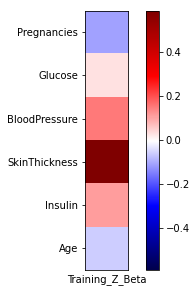

In [147]:
#Plotting betas for linear regression model that was trained on the z-scored training data:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(model_z.coef_).max()
cax = ax.matshow(np.reshape(model_z.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(input_variables_list)
ax.set_xticks([])
ax.set_xlabel('Training_Z_Beta')

In [148]:
#Training a linear regression model to predict BMI from the below z-scored variables: Test Dataset
input_variables_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
X = df_test[input_variables_list].to_numpy()
Y = df_test['BMI'].to_numpy()
X_z = (X-X.mean(axis=0,keepdims=True))/X.std(axis=0,keepdims=True)
Y_z = (Y-Y.mean(axis=0,keepdims=True))/Y.std(axis=0,keepdims=True)
model_z = LinearRegression()
model_z.fit(X_z,Y_z)
y_z_pred = model_z.predict(X_z)

In [149]:
#Now calculating the mean squared error for z-scored test dataset.
np.square(y_z_pred-Y).mean()
np.corrcoef(y_z_pred,Y)
model_z.coef_

array([-0.03791335, -0.01078591,  0.25666692,  0.58747123,  0.15871903,
       -0.04298777])

Text(0.5, 0, 'Test_Z_Beta')

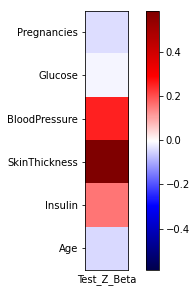

In [150]:
#Plotting betas for linear regression model that was trained on the z-scored test data:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(model_z.coef_).max()
cax = ax.matshow(np.reshape(model_z.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(input_variables_list)
ax.set_xticks([])
ax.set_xlabel('Test_Z_Beta')

In [151]:
#Training a linear regression model to predict BMI from the below z-scored variables: Validation Dataset
input_variables_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
X = df_validation[input_variables_list].to_numpy()
Y = df_validation['BMI'].to_numpy()
X_z = (X-X.mean(axis=0,keepdims=True))/X.std(axis=0,keepdims=True)
Y_z = (Y-Y.mean(axis=0,keepdims=True))/Y.std(axis=0,keepdims=True)
model_z = LinearRegression()
model_z.fit(X_z,Y_z)
y_z_pred = model_z.predict(X_z)

In [152]:
#Now calculating the mean squared error for z-scored Validation dataset.
np.square(y_z_pred-Y).mean()
np.corrcoef(y_z_pred,Y)
model_z.coef_

array([-0.01684035, -0.04223259,  0.25841854,  0.64013043,  0.11444294,
       -0.0817673 ])

Text(0.5, 0, 'Validation_Z_Beta')

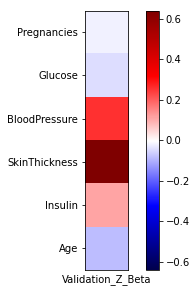

In [153]:
#Plotting betas for linear regression model that was trained on the z-scored validation data:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(model_z.coef_).max()
cax = ax.matshow(np.reshape(model_z.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(input_variables_list)
ax.set_xticks([])
ax.set_xlabel('Validation_Z_Beta')

In [154]:
from sklearn.linear_model import LogisticRegression

In [157]:
#Creating and assessing accuracy of the Logistic Regression model to determine L2 regularization for the training data
X_train_logistic = df_training[df_training.columns[:-1]].to_numpy(dtype=np.float32)
y_train_logistic = df_training[df_training.columns[-1]].to_numpy(dtype=np.float32)
X_train_logistic_mean = X_train_logistic.mean(axis=0)
X_train_logistic_std = X_train_logistic.std(axis=0)
X_train_logistic_z = (X_train_logistic-X_train_logistic_mean)/X_train_logistic_std
logistic = LogisticRegression(max_iter=1000,penalty='none')
logistic.fit(X_train_logistic_z,y_train_logistic)
y_train_preds_logistic = logistic.predict(X_train_logistic_z)
np.equal(y_train_preds_logistic,y_train_logistic).mean()

0.7789855072463768

In [158]:
#Now Creating and assessing accuracy of the Logistic Regression model to determine L2 regularization for the validation data
X_train_logistic = df_validation[df_validation.columns[:-1]].to_numpy(dtype=np.float32)
y_train_logistic = df_validation[df_validation.columns[-1]].to_numpy(dtype=np.float32)
X_train_logistic_mean = X_train_logistic.mean(axis=0)
X_train_logistic_std = X_train_logistic.std(axis=0)
X_train_logistic_z = (X_train_logistic-X_train_logistic_mean)/X_train_logistic_std
logistic = LogisticRegression(max_iter=1000,penalty='none')
logistic.fit(X_train_logistic_z,y_train_logistic)
y_train_preds_logistic = logistic.predict(X_train_logistic_z)
np.equal(y_train_preds_logistic,y_train_logistic).mean()

0.8557692307692307

In [161]:
from sklearn.model_selection import train_test_split

In [164]:
#Creating Test Split to determine L2 Regularization
df_train_validation, df_test_validation = train_test_split(df_training,test_size=0.25,random_state=0)

In [165]:
features = [x for x in df_training.columns if x!='Outcome']

In [167]:
x_train_validation_multinomial = df_train_validation[features].to_numpy()
y_train_validation_multinomial = df_train_validation['Outcome'].to_numpy()
x_test_validation_multinomial = df_test_validation[features].to_numpy()
y_test_validation_multinomial = df_test_validation['Outcome'].to_numpy()

In [168]:
x_train_validation_multinomial_mean = x_train_validation_multinomial.mean(axis=0)
x_train_validation_multinomial_std = x_train_validation_multinomial.std(axis=0)
x_train_validation_multinomial_z = (x_train_validation_multinomial-x_train_validation_multinomial_mean)/x_train_validation_multinomial_std
x_test_validation_multinomial_z = (x_test_validation_multinomial-x_train_validation_multinomial_mean)/x_train_validation_multinomial_std

In [169]:
models ={}
validation_accs = []
for c in [np.inf, 1000,100,10,1,0.1,0.01,0.001,0.0001]:
    print('C=' +str(c))
    if c == np.inf:
        multinomial = LogisticRegression(multi_class='multinomial',max_iter=10000,penalty='none')
    else:
        multinomial = LogisticRegression(multi_class='multinomial',max_iter=10000,penalty='l2',C=c)
    multinomial.fit(x_train_validation_multinomial_z,y_train_validation_multinomial)
    models[c] = multinomial
    y_train_validation_preds_multinommial = multinomial.predict(x_train_validation_multinomial_z)
    print('Train Validation Accuracy')
    print(np.equal(y_train_validation_preds_multinommial,y_train_validation_multinomial).mean())
    print('Test Validation Accuracy')
    validation_acc = np.equal(multinomial.predict(x_test_validation_multinomial_z),y_test_validation_multinomial).mean()
    print(validation_acc)
    validation_accs.append(validation_acc)

C=inf
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=1000
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=100
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=10
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=1
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=0.1
Train Validation Accuracy
0.782608695652174
Test Validation Accuracy
0.782608695652174
C=0.01
Train Validation Accuracy
0.7745571658615137
Test Validation Accuracy
0.7729468599033816
C=0.001
Train Validation Accuracy
0.7037037037037037
Test Validation Accuracy
0.714975845410628
C=0.0001
Train Validation Accuracy
0.6666666666666666
Test Validation Accuracy
0.6859903381642513


In [170]:
#It appears that C=10 is one of the best/most accurate L2 regularization strenghts.

In [185]:
#Training a logistic regression based on the test data taking into account the C=10 L2 regularization
X_test_logistic = df_test[df_test.columns[:-1]].to_numpy(dtype=np.float32)
y_test_logistic = df_test[df_test.columns[-1]].to_numpy(dtype=np.float32)
X_test_logistic_mean = X_test_logistic.mean(axis=0)
X_test_logistic_std = X_test_logistic.std(axis=0)
X_test_logistic_z = (X_test_logistic-X_train_logistic_mean)/X_test_logistic_std
logistic = LogisticRegression(max_iter=1000,penalty='l2',C=10)
logistic.fit(X_test_logistic_z,y_test_logistic)
y_test_preds_logistic = logistic.predict(X_test_logistic_z)
np.equal(y_test_preds_logistic,y_test_logistic).mean()

0.8761904761904762

Text(0.5, 1.05, 'Logistic Regression Betas for Best Test Set')

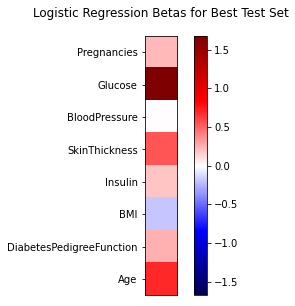

In [187]:
#Plotting betas for above regression
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(logistic.coef_).max()
cax = ax.matshow(np.reshape(logistic.coef_,[-1,1]),cmap='seismic',aspect='1',vmax=cmax,vmin=-1.0*cmax)
fig.colorbar(cax)
ax.set_yticks(list(range(len(df_test.columns[:-1]))))
ax.set_yticklabels(df_test.columns[:-1])
ax.set_xticks([])
plt.title('Logistic Regression Betas for Best Test Set')